# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.  Наша задача — провести исследовательский анализ данных, который поможет установить параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

Импортируем библиотеки для работы с данными

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Записываем датасет в data

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Посмотрим информацию о нашем датасете.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Описание данных
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

Ознакомимся с первыми 5 строками.

In [4]:
pd.set_option('display.max_columns', None)
data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Взглянем на гистограммы численных значений в нашем датасете.

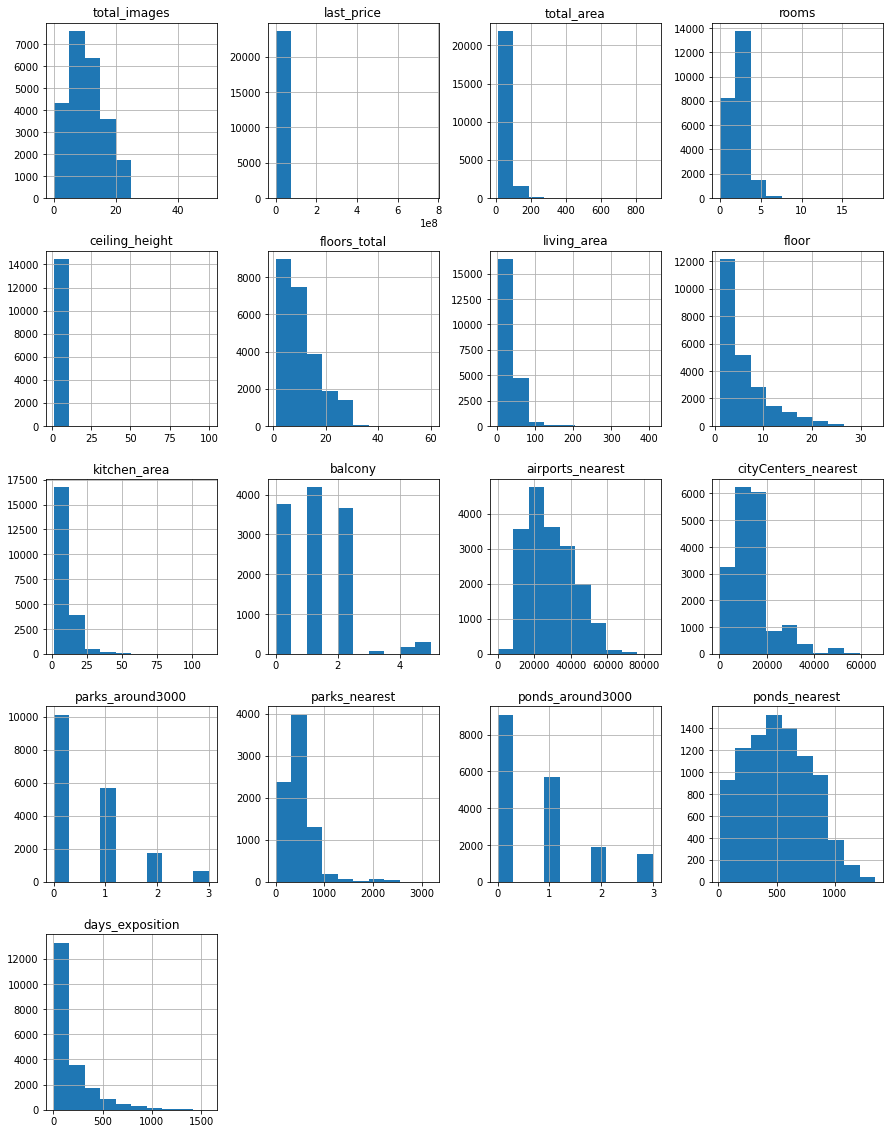

In [5]:
data.hist(figsize=(15, 20));

Гистограммы столбцов `last_price`, `total_area` и `ceiling_height` выглядят наиболее странными, почему, попробуем разобраться далее.

### Предобработка данных

Для начала приведем название столбцов к единому виду, а именно столбыца `cityCenters_nearest`, `parks_around3000`, `ponds_around3000` переименуем в `city_centers_nearest`, `parks_around_3000`, `ponds_around_3000` соответственно.

In [6]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                        'parks_around3000': 'parks_around_3000', 
                        'ponds_around3000': 'ponds_around_3000',
                       })


Посмотрим пропуски в столбцах.

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

 Пропуски в столбцах `floors_total`, `locality_name`, скорее всего, обусловлены тем, что они вводятся человеком при размещении объявления, и их просто не ввели, заполнить их мы сами не можем, и их количество менее 1%, поэтому, мы не будем их учитывать в нашем анаизе.
 Пропуски в столбцах  `ceiling_height`, `living_area`, `kitchen_area` тоже, скорее всего, обусловлены тем, что они вводятся человеком при размещении объявления, и их просто не ввели, но, например, пропуски в столбце `ceiling_height` есть в 38% данных, просто так исключить мы их не можем, т.к. это сильно повлияет на анализ. Можно заменить пропуски в этих столбцах на медианное значение из других строк со схожей общей площадью.
 Пропуски в столбцах `parks_around_3000`, `ponds_around_3000` говорят нам, скорее всего, о том, что на расстоянии 3000 метров от квартиры нет парков или водоемов, но это можно будет проверить, посмотрев в значении `parks_nearest` и `ponds_nearest`.
 В столбце `is_apartment` должны быть булевы значения, т.е. тип данных bool, а не object, из-за этого, скорее всего, и появились пропуски.
 В столбце `balcony` указаны количество балконов, поэтому пропуски, скорее всего, говорят нам, что балконов в этой квартире нет, и их можно заменить на 0.
 Столбца `airports_nearest`, `city_сenters_nearest` и `days_exposition` должны заполняться автоматически, и пропуски в них могут говорить,что либо есть ошибка в выгрузке данных, эти объекты слишком далеко, и алгоритм до них просто не считает.. Запонлять их самим мы не можем, поэтому не будетм учитывать их в нашем анализе.
 

**Работа с пропусками в столбце `balcony`**

Заполним пропуски в столбце `balcony` значением 0.

In [8]:
data['balcony'] = data['balcony'].fillna(value=0) 

Проверим, что пропуски заполнились.

In [9]:
data['balcony'].isna().sum()

0

**Работа с пропусками в столбце `is_apartment`**

Посмотрим на уникальные значения в столбце `is_apartment`:

In [10]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Т.к. апартаменты не так сильно распространены, как жилые квартиры, то можем предположить, чкорее всего,пропуск в столбце значит, что квартира не апартаменты, поэтому изменим тип данных на bool и заполним пропуски значением False.

In [11]:
data['is_apartment'].astype('bool')
data['is_apartment'] = data['is_apartment'].fillna(value=False)

Проверим, что в столбце теперь только два значения.

In [12]:
data['is_apartment'].unique()

array([False,  True])

**Работа с пропусками в столбцах `parks_around3000`, `ponds_around3000`**

Посмотрим, есть ли значения в столбцах `parks_nearest` и `ponds_nearest` при пропуске в столбцах `parks_around_3000`, `ponds_around_3000`

In [13]:
print('Уникальные значения в столбце parks_nearest при пропуске в столбце parks_around_3000:', data[data['parks_around_3000'].isna()]['parks_nearest'].unique())
print('Уникальные значения в столбце ponds_nearest при пропуске в столбце ponds_around_3000:', data[data['ponds_around_3000'].isna()]['ponds_nearest'].unique())


Уникальные значения в столбце parks_nearest при пропуске в столбце parks_around_3000: [nan]
Уникальные значения в столбце ponds_nearest при пропуске в столбце ponds_around_3000: [nan]


Мы видим, что при отсутствии значений в столбцах `parks_around_3000`, `ponds_around_3000` в таблице отсутвтиуют значения в столбцах `parks_nearest` и `ponds_nearest`. 
Возможно, это связано с тем, что рядом с этими квартирами нет парков и водоемов вообще (по крайней мере на расстоянии, на котором заложено в алгоритме определения), либо есть ошибка в выгрузке данных. 
Можем заполнить эти пропуски значением 0

In [14]:
data['parks_around_3000'] = data['parks_around_3000'].fillna(value=0) 
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(value=0) 

Проверим, заполнились ли пропуски.

In [15]:
print('количество пропусков в столбце parks_around_3000:', data['parks_around_3000'].isna().sum())
print('количество пропусков в столбце ponds_around_3000:', data['ponds_around_3000'].isna().sum())

количество пропусков в столбце parks_around_3000: 0
количество пропусков в столбце ponds_around_3000: 0


**Форматирования типа данных в столбце `first_day_exposition`**

Сейчас формат данных в столбце `first_day_exposition` - object, для удобства работы с ним переведем его в формат datetime64.

In [16]:
#форматируем столбец
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#выводим первые 5 строк, чтобы удостовериться, тчо все выполнено верно
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

**Поиск дублей и рабоота с пропусками в столбце `locality_name`**

Проверим датасет на явные дубликаты.

In [17]:
data.duplicated().sum()

0

Явных дубликатов в таблице нет. 

Проверим столбец `locality_name` на неявные дубли. Посмотрим все уникальные значения в нем.

In [18]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Посмотрим количество ункиальных значений.

In [19]:
data['locality_name'].nunique()

364

Мы видим, что часто встречаются одинаковые названия населенных пунктов, но в одно случае указан пос**Ё**лок, а в другом пос**Е**лок. А некоторые поселки городского типа записаны как городские поселки.
Заменим букву ё, на букву е в столбце.
Заменим "городской поселок" на "поселок городского типа"

In [20]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')

Посмотрим количество уникальных значений

In [21]:
data['locality_name'].nunique()

323

Нам удалось избавиться от 41 дубля.

In [22]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары',
       'поселок городского типа Янино-1', 'поселок Парголово',
       'поселок Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посел

У нас есть следующие неявные дубли:
поселок Мурино - Мурино,
деревня Кудрово - Кудрово,
Никольское	- село Никольское,
село Павлово - городской поселок Павлово,
поселок Рябово - поселок городского типа Рябово.
Заменим их

In [23]:
data['locality_name'] = data['locality_name'].replace('поселок Мурино', 'Мурино')
data['locality_name'] = data['locality_name'].replace('деревня Кудрово', 'Кудрово')
data['locality_name'] = data['locality_name'].replace('Никольское', 'село Никольское')
data['locality_name'] = data['locality_name'].replace('село Павлово', 'городской поселок Павлово')
data['locality_name'] = data['locality_name'].replace('поселок Рябово', 'поселок городского типа Рябово')


Посмотрим, сколько уникальных значений у нас осталось.

In [24]:
data['locality_name'].nunique()

319

Т.к. мы не знаем, какие населенные пункты могли быть указаны в пропусках, то лучше не учитывать эти строки в нашем анализе. Удалим их.

In [25]:
data = data.dropna(subset=['locality_name']) 

Проверим, что мы удалили все пропуски.

In [26]:
data['ponds_around_3000'].isna().sum()

0

**Поиск аномальных значений**

Посмотрим аномальные значений в столбцах, которые, скорее всего, заполнял пользователь: `last_price`, `living_area`, `total_area`, `rooms`, `ceiling_height`, `floors_total`, `kitchen_area`.

Начнем с самого простого - `floors_total`.

In [27]:
data['floors_total'].describe()

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

В ленинградской области самый высокий жилой дом - Жилой Комплекс «Князь Александр Невский» 37 этажей. Поэтому, если у нас не указано, что квартира - апартаменты, то в данных есть ошибка. Проверим.

In [28]:
data.query('is_apartment == True and floors_total > 37')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


В нашей таблице нет апартаментов на этажах выше 37, поэтому в квартирах, где указан этаж выше явно ошибка. Удалим эти строки.

In [29]:
data = data.loc[data['floors_total'] <= 37] 

Подобным же образом проанализируем столбец `floor`

In [30]:
data['floor'].describe()

count    23563.000000
mean         5.877690
std          4.871037
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Максимальное значение 33 этаж, никаких противоречий нет.
Осталось проверить, есть ли у нас квартиры, этаж которых больше этажей в здании.

In [31]:
data.query('floor > floors_total')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


Таких объектов нет.

**Проанализируем столбец  `total_area`**

In [32]:
data['total_area'].describe()

count    23563.000000
mean        60.324316
std         35.658196
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Мы видим, что минимальный размер объекта - 12 м2, согласно нормам строительства (СНиП 2.08.01-85 Жилые здания), минимальный размер квартиры - 33м2, но размер комнаты общежития, например, моэет быть и 6 м2. Поэтому мы не можем исключить эти значения.

**Проанализируем столбец `last_price`.**

In [33]:
data['last_price'].describe()

count    2.356300e+04
mean     6.540283e+06
std      1.091137e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.647000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

У нас есть минимум в 12 190 рублей, такая цена невозможна за квартиру. Посмотрим, какие квартиры у нас есть дешевле 400 000 рублей.

In [34]:
data.loc[data['last_price'] <= 400000] 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,False,False,40.5,0.0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


Единственная квартира в Санкт-Петербурге, в цене явно ошибка. Возможно, ошиблись при вводе цены на один или два порядка, чтобы не искажать наш анализ, удалим это значение.

In [35]:
data = data.loc[data['last_price'] >= 400000] 

Также у нас в датасете есть квартира ценой более 700 000 000 рублей, посмотрим на город и площадь квартир более 500 000 000 рублей.

In [36]:
data.loc[data['last_price'] >= 500000000] 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
12971,19,763000000.0,400.0,2017-09-30,7,NaN,10.0,250.0,10,False,False,False,NaN,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0


Квартира недалеко от центра, площадью 400 м2, плюс на самом верхнем этаже. Элитный пентхаус такой площади может столько стоить, но в данном случае, это уникальный объект, который явно выбивается из нашей подборки, поэтому, удалим его, для более удобного анализа.

In [37]:
data = data.loc[data['last_price'] < 500000000] 

**Проанализируем столбец `ceiling_height`.**

In [38]:
data['ceiling_height'].describe()

count    14478.000000
mean         2.771285
std          1.262113
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Потолков с высотой 100 метров не бывает в жилых помещениях, посмотрим самые большие значения в высоте потолков.

In [39]:
data.sort_values(by='ceiling_height', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25,1,100.0,5.0,14.0,5,True,False,False,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0
22336,19,9999000.0,92.4,2019-04-05,2,32.0,6.0,55.5,5,False,False,False,16.5,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3.0,53.0,2,False,False,False,8.0,0.0,Волхов,NaN,NaN,0.0,NaN,0.0,NaN,NaN
21377,19,4900000.0,42.0,2017-04-18,1,27.5,24.0,37.7,19,False,False,False,11.0,2.0,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36.0,41.0,13,False,False,False,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
21824,20,2450000.0,44.0,2019-02-12,2,27.0,2.0,38.0,2,False,False,False,8.6,2.0,поселок городского типа Большая Ижора,NaN,NaN,0.0,NaN,0.0,NaN,NaN
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25.0,17.0,17,False,False,True,NaN,2.0,Мурино,NaN,NaN,0.0,NaN,0.0,NaN,28.0
10773,8,3800000.0,58.0,2017-10-13,2,27.0,10.0,30.1,3,False,False,False,8.1,2.0,Мурино,NaN,NaN,0.0,NaN,0.0,NaN,71.0
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5.0,30.0,3,False,False,False,9.0,2.0,деревня Мины,NaN,NaN,0.0,NaN,0.0,NaN,540.0
22938,14,4000000.0,98.0,2018-03-15,4,27.0,2.0,73.0,2,True,False,False,9.0,1.0,деревня Нижняя,NaN,NaN,0.0,NaN,0.0,NaN,27.0


Мы можем предположить, что пользователи ошиблись при вводе высоты потолков, и вместо 2,75м, ввели 27,5, поэтому все значения больше 10 метров делим на 10.

In [40]:
data['ceiling_height'].where(data['ceiling_height'] > 10, data['ceiling_height']/10)
    

0        0.270
1          NaN
2          NaN
3          NaN
4        0.303
         ...  
23694    0.370
23695      NaN
23696      NaN
23697    0.300
23698    0.250
Name: ceiling_height, Length: 23561, dtype: float64

In [41]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [42]:
data['ceiling_height'].describe()

count    14478.000000
mean         2.771285
std          1.262113
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Согласно нормам строительства( СНиП 2.08.01-85 Жилые здания), потолки в жилых помещениях не могут быть ниже 2,5 метров. Согласно этой же норме, высота потолков в новых зданиях не может быть выше 3 метров, но также есть квартиры в старом фонде и элитная недвижимость, где высота потолков может доходить до 4,5 метров. Поэтому все квартиры, у которых высота потолков до 2,5 метров и свыше 5 явно внесены с ошибкой. Сбросим эти значения.

In [43]:
data.loc[(data['ceiling_height'] <= 2.5) | (data['ceiling_height'] >= 5), 'ceiling_height'] = None 

Посмотрим на количество пропусков в столбце `ceiling_height`.

In [44]:
data['ceiling_height'].isna().sum()

12708

Почти половина всех значений. Избавиться от них мы не можем. Но мы можем предположить, что квартиры, с пропусками имеют схожую высоту потолков с другими квартирами, поэтому, для анализа заполним эти пропуски медианным значением столбца `ceiling_height`.

Заполним пропуски в столбце `ceiling_height` медианным значением.

In [45]:

data.loc[(data['ceiling_height'].isna()), 'ceiling_height'] = \
    data['ceiling_height'].median()
    

Проверим пропуски.

In [46]:
data['ceiling_height'].isna().sum()

0

Посмотрим распределение:

In [47]:
data['ceiling_height'].describe()

count    23561.000000
mean         2.746183
std          0.191960
min          2.510000
25%          2.700000
50%          2.700000
75%          2.700000
max          4.900000
Name: ceiling_height, dtype: float64

Мы заполнили все пропуски.

**Проанализируем столбец `kitchen_area`.**

In [48]:
data['kitchen_area'].describe()

count    21340.000000
mean        10.559578
std          5.897397
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Проверим, есть ли в нашем датасете объекты, в которых площадь кухни больше площади квартиры.

In [49]:
data.query('kitchen_area > total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


Таких объектов нет, это хорошо. 
В описании данных мы видим, что минимальная площадь кухни у нас 1,3 метра, такого не может быть. Согласно СНиП площадь кухни не может быть меньше 5 м2. Возможно, что кухни меньше указывают при свободной планировке.
Посмотрим, сколько у нас объектов с кухней менее 5 м2, и имеют несвободную планировку.

In [50]:
len(data.loc[(data['kitchen_area'] < 5) & (data['open_plan'] == False)])

104

104 значения, это явно ошибка в вводе данных.
Уберем эти значения.

In [51]:
data.loc[(data['kitchen_area'] < 5) & (data['open_plan'] == False), 'kitchen_area'] = None 

Посмотрим на объекты, в которых площадь кухни больше 50 м2.

In [52]:
data[['total_area', 'rooms', 'living_area', 'kitchen_area', 'open_plan']].loc[(data['kitchen_area'] > 50)].sort_values(by='kitchen_area', ascending=False).head(10)


,total_area,rooms,living_area,kitchen_area,open_plan
19540,900.0,12,409.7,112.0,False
20215,249.7,3,72.0,107.0,False
2489,255.0,3,153.9,100.7,False
5358,590.0,15,409.0,100.0,False
16239,181.1,3,58.2,93.2,False
16797,146.0,2,40.0,93.0,False
10867,177.9,3,87.2,87.2,False
492,216.0,4,86.0,77.0,False
4394,174.0,3,95.0,77.0,False
14644,150.0,4,58.0,75.0,False


Мы видим, что большие площади кухни в квартирах с большой площадью, явных противоречий нет. Есть объекты, где площадь кухни больше жилой площади, возможно, в этом есть ошибка, но проверить это мы не можем, поэтому оставим эти значения.

Как и в случае с высотой потолка, предположим, что у квартир со схожей общей площади схожие площади кухнь.
Заполним пропуски в столбце `kitchen_area` медианным значением каждого типа площади объекта `total_area_range_type`

Посмотрим, как делятся квартиры поо общей площади на 5 равных групп.

In [53]:
pd.qcut(data['total_area'], q=5)

0         (74.8, 900.0]
1          (37.6, 46.0]
2          (46.0, 58.0]
3         (74.8, 900.0]
4         (74.8, 900.0]
              ...      
23694     (74.8, 900.0]
23695      (58.0, 74.8]
23696      (46.0, 58.0]
23697     (74.8, 900.0]
23698    (11.999, 37.6]
Name: total_area, Length: 23561, dtype: category
Categories (5, interval[float64]): [(11.999, 37.6] < (37.6, 46.0] < (46.0, 58.0] < (58.0, 74.8] < (74.8, 900.0]]

Создадим категории площади помещения:
- `E` 11.999 - 37.6 м2
- `D` 37.6 - 46.0 м2
- `C` 46.0 - 58.0 м2
- `B` 58.0 - 75.0 м2
- `A` 75.0 - 900.0 м2

In [54]:
#создаем список названий для категорий
total_area_lebel = ['E', 'D', 'C', 'B', 'A']
#добавляем столбец 'total_area_range' со значениями категорий площади
data['total_area_range'] = pd.qcut(data['total_area'], q=5)
#добавляем столбец 'total_area_range_type' со названиями категорий площади
data['total_area_range_type'] = pd.qcut(data['total_area'], q=5, labels=total_area_lebel)
#выводим первые 5 строк
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,total_area_range,total_area_range_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,"(74.8, 900.0]",A
1,7,3350000.0,40.4,2018-12-04,1,2.70,11.0,18.6,1,False,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,"(37.6, 46.0]",D
2,10,5196000.0,56.0,2015-08-20,2,2.70,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,"(46.0, 58.0]",C
3,0,64900000.0,159.0,2015-07-24,3,2.70,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,"(74.8, 900.0]",A
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,"(74.8, 900.0]",A


In [55]:
for t, in data['total_area_range_type'].unique():
    data.loc[(data['total_area_range_type'] == t) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[data['total_area_range_type'] == t , 'kitchen_area'].median()
    

Проверим, что все пропуски заполнены.

In [56]:
data['kitchen_area'].isna().sum()

0

**Проанализируем столбец `living_area`.**

In [57]:
data['living_area'].describe()

count    21696.000000
mean        34.446429
std         21.998111
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Проверим, есть ли в нашем датасете объекты, в которых жилая площадь больше площади квартиры.

In [58]:
data.query('living_area > total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,total_area_range,total_area_range_type


Таких объектов нет, это хорошо. В описании данных мы видим, что жилая площадь у нас 2 метра, такого не может быть. Согласно СНиП площадь комнаты не может быть меньше 8 м2. Возможно, что жилую площадь указывают меньше указывают при свободной планировке. Посмотрим, сколько у нас объектов с жилой площадью менее 8 м2, и имеют несвободную планировку.

In [59]:
len(data.loc[(data['living_area'] < 8) & (data['open_plan'] == False)])

8

Таких объектов всего 8. Уберем эти значения.

In [60]:
data.loc[(data['living_area'] < 8) & (data['open_plan'] == False), 'living_area'] = None

Посмотрим на объекты, в которых жилая площадь больше 50 м2.

In [61]:
data[['total_area', 'rooms', 'living_area', ]].loc[(data['living_area'] > 50)].sort_values(by='living_area', ascending=False).head(10)

,total_area,rooms,living_area
19540,900.0,12,409.7
5358,590.0,15,409.0
12401,495.0,7,347.5
4237,517.0,7,332.0
12859,631.2,7,322.3
660,483.9,7,312.5
8018,507.0,5,301.5
14088,402.0,6,300.0
20273,460.8,6,279.6
22494,491.0,5,274.0


Мы видим, что большие жилые площади в квартирах с большой площадью, явных противоречий нет. 

Как и в случае с высотой потолка, предположим, что у квартир со схожей общей площади схожие жилые площади.
Заполним пропуски в столбце `living_area` медианным значением каждого типа площади объекта `total_area_range_type`

In [62]:
for t, in data['total_area_range_type'].unique():
    data.loc[(data['total_area_range_type'] == t) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[data['total_area_range_type'] == t , 'living_area'].median()
    

Проверим, что все пропуски заполнены.

In [63]:
data['living_area'].isna().sum()

0

Столбцы `total_area_range` и `total_area_range_type` в дальнейшем нам не понадобятся, поэтому, моэем их удалить.

In [64]:
data.drop(columns = ['total_area_range', 'total_area_range_type'], axis = 1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.70,11.0,18.6,1,False,False,False,11.00,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.70,5.0,34.3,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.70,14.0,55.0,9,False,False,False,14.00,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,2.70,5.0,38.0,4,False,False,False,8.50,0.0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,2.70,3.0,29.7,1,False,False,False,8.40,0.0,село Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,55.0,12,False,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Проверим, что мы заполнили все пропуски, где это было возможно сделать

In [65]:
data.isna().sum()

total_images                 0
last_price                   0
total_area                   0
first_day_exposition         0
rooms                        0
ceiling_height               0
floors_total                 0
living_area                  0
floor                        0
is_apartment                 0
studio                       0
open_plan                    0
kitchen_area                 0
balcony                      0
locality_name                0
airports_nearest          5524
city_centers_nearest      5501
parks_around_3000            0
parks_nearest            15535
ponds_around_3000            0
ponds_nearest            14527
days_exposition           3171
total_area_range             0
total_area_range_type        0
dtype: int64

Пропуски остались только в значениях, добавленных автоматически, которые мы не можем заполнить, и не можем удалить, т.к. их слишком много.

**Вывод** Мы провели предобаботку данных:
- Переименовали столбцы, чтобы привезти их названия к единому виду: `cityCenters_nearest`, `parks_around3000`, `ponds_around3000`  в `city_centers_nearest`, `parks_around_3000`, `ponds_around_3000` соответственно,
- Изменили тип данных в некоторых столбцах,  где это необходимо было: `is_apartment` сделали типом bool, `first_day_exposition` сделали типом datetime64
- Удалили строки с пропусками в столбах `floors_total`, `locality_name`, т.к. заполнить их самостоятельно мы не можем,
- частично заполнили пропуски, где это возможно, а именно: в столбах `living_area`, `kitchen_area` заполнили медианами значений объектов со схожей общей площадью, в столбце `ceiling_height` заполнили медианным значением, в столбах `parks_around_3000`, `ponds_around_3000`, `balcony` заполнили пропуски 0, в столбец `is_apartment` пропуски заполнили значением False,
- У столбах `airports_nearest`, `city_сenters_nearest` и `days_exposition`, скорее всего ,данные должны подгружаться автоматически, поэтому на пропуски в этих столбах необходимо обратить внимание и, возможно, исправить ошибку в выгрузке данных, в данном анализе эти пропуски мы не удаляли и не заполняли,
- В столице `locality_name` выявили и исправили неявные дубли,
- Убрали редкие и выбивающиеся значения.


### Посчитайте и добавьте в таблицу новые столбцы

**Цена одного квадратного метра**

Добавим в таблицу столбец `price_per_square`, который будет равен цене квадратного метра объекта. Расчитаем его, как последнюю цену объекта `last_price` деленную на площадь объекта `total_area`

In [66]:
#создаем столбец price_per_square, путем деления столбца last_price на total_area
data['price_per_square'] = data['last_price'] / data['total_area']
#округляем до десятых значения в столбце price_per_square, т.к. цена не может быть менее 1 копейки
data = data.round({'price_per_square': 2})
#выводим первые 5 строк столбцов 'last_price', 'total_area', 'price_per_square', чтобы убедиться, тто все сделано верно
data[['last_price', 'total_area', 'price_per_square']].head()

,last_price,total_area,price_per_square
0,13000000.0,108.0,120370.37
1,3350000.0,40.4,82920.79
2,5196000.0,56.0,92785.71
3,64900000.0,159.0,408176.10
4,10000000.0,100.0,100000.00


**День недели публикации объявления**

Создаим столбец `weekday`, который будет показывать нам день недели публикации объявления.

In [67]:
#Создаем столбец weekday
data['weekday'] = data['first_day_exposition'].dt.weekday
#выводим первые 5 строк, чтобы убедиться, тчо все сделано
data[['first_day_exposition', 'weekday']].head()

,first_day_exposition,weekday
0,2019-03-07,3
1,2018-12-04,1
2,2015-08-20,3
3,2015-07-24,4
4,2018-06-19,1


**Месяц публикации объявления**

Создаим столбец `month`, который будет показывать нам месяц публикации объявления.

In [68]:
#Создаем столбец month
data['month'] = data['first_day_exposition'].dt.month
#выводим первые 5 строк, чтобы убедиться, тчо все сделано
data[['first_day_exposition', 'month']].head()

,first_day_exposition,month
0,2019-03-07,3
1,2018-12-04,12
2,2015-08-20,8
3,2015-07-24,7
4,2018-06-19,6


**Год публикации объявления**

Создаим столбец `year`, который будет показывать нам год публикации объявления.

In [69]:
#Создаем столбец month
data['year'] = data['first_day_exposition'].dt.year
#выводим первые 5 строк, чтобы убедиться, тчо все сделано
data[['first_day_exposition', 'year']].head()

,first_day_exposition,year
0,2019-03-07,2019
1,2018-12-04,2018
2,2015-08-20,2015
3,2015-07-24,2015
4,2018-06-19,2018


**Тип этажа квартиры**

Создадим столбец `floor_type`, который будет отображать тип этажа объект:
 - если объект находится на первом этаже - 'первый'
 - если объект находится на последнем этаже - 'последний'
 - если объект не находится ни на первом, ни на последнем этаже - 'другой'

In [70]:
#если объект на 1 этаже, то ему присваевается значение первый
data.loc[data['floor'] == 1, 'floor_type'] = 'первый'
#если объект на последнем этаже, то ему присваевается значение последний
data.loc[data['floor'] == data['floors_total'], 'floor_type'] = 'последний'
#если объект не на первом и не на последнем, то ему присваевается значение другой
data.loc[(data['floor'] != data['floors_total']) & (data['floor'] != 1), 'floor_type'] = 'другой'
#посмотрим, всем ли строкам присвоены значения
data['floor_type'].unique()


array(['другой', 'первый', 'последний'], dtype=object)

**Расстояние до центра города в километрах**

Создадим столбец `distance_to_center_km`, который будет показывать расстояние до центра города в целых километрах

In [71]:
#создаем колонку distance_to_center_km, деля значения из city_centers_nearest на 1000 (т.к. в 1 км 1000 м)
data['distance_to_center_km'] = data['city_centers_nearest'] / 1000
#округляем значения до целых
data = data.round({'distance_to_center_km': 0})
#выводим первые 5 строк, чтобы убедиться, что все сделано верно
data[['city_centers_nearest', 'distance_to_center_km']].head()

,city_centers_nearest,distance_to_center_km
0,16028.0,16.0
1,18603.0,19.0
2,13933.0,14.0
3,6800.0,7.0
4,8098.0,8.0


### Проведите исследовательский анализ данных

#### Общая площадь

Изучим значения общей площади.
Построим гистограмму по столбцу `total_area`

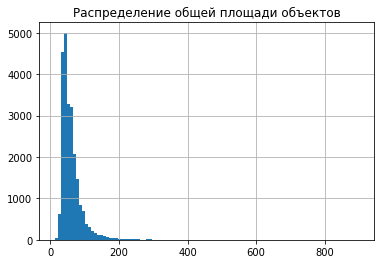

In [72]:
data['total_area'].hist(bins=100);
plt.title('Распределение общей площади объектов')
plt.show()

мы видим, что большая часть значений находится в пределах 10 - 200, далее уже идут редкие значения и, возможно, выбросы.

In [73]:
data['total_area'].describe()

count    23561.000000
mean        60.307833
std         35.589560
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Больше всего объектов с площадью до 70 м2. Средний размер - 60,3 м2, медианный - 52 м2. Посмотрим на "ящик с усами"

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8b44b00f40>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8b44b0e640>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8b44b00be0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8b44b0ed00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8b44b1c0a0>],
 'means': []}

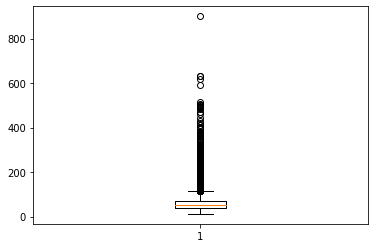

In [74]:
plt.boxplot(x=data['total_area'])

Нижний «ус» около 12, минимальное значение. Верхний заканчивается около 100 — это 1,5 межквартильного размаха, добавленного к 3-му квартилю. Это ориентировочная граница нормального размаха. Всё, что лежит за ней, можно считать выбросом. Более высокие значения рисуются отдельными точками, но сливаются в единую жирную линию: таких выбросов очень много. И всё же значения, которые отсёк верхний «ус», — редкие. Видно, насколько медиана (оранжевая линия) не стремится к длинному хвосту высоких значений. 

Посмотрим, сколько объектов с общей площадью более 200 м2, это могут быть, как бывшие комунальные квартиры в Санкт Петербурге, так и элитное жилье.

In [75]:
print('Объектов с общей площадью более 200 м2:', ((len(data.query('total_area > 200')) / len(data)) * 100), '% от общего количества объектов')


Объектов с общей площадью более 200 м2: 0.9549679555197147 % от общего количества объектов


Менее 1%, мы можем исключить их из анализа.

In [76]:
data = data.query('total_area < 200')

Построим гистограмму по отфильтрованным данным.

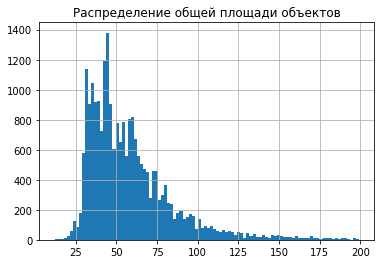

In [77]:
data['total_area'].hist(bins=100);
plt.title('Распределение общей площади объектов')
plt.show()

Самые распространенные объекты с площадью от 30 до 100 м2. Средний размер - 60,3 м2, медианный - 52 м2.

#### Жилая площадь

Изучим значения жилой площади.
Построим гистограмму по столбцу `living_area`

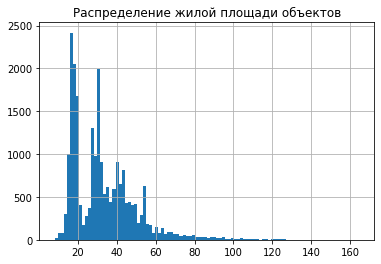

In [78]:
data['living_area'].hist(bins=100);
plt.title('Распределение жилой площади объектов')
plt.show()

Мы видим, что большая часть значений находится в пределах 10 - 100, далее уже идут редкие значения и, возможно, выбросы. Есть пики около 15, 30, 40 и 50 м2. Около 15 м2 - это могут быть однокомнатные квартиры, комнаты в коммуналках. Около 30 м2 - это могут быть двухкомнатные квартиры. Около 40 м2 - трехкомнатные квартиры. Около 50 м2 - четырехкомнатные квартиры, бывшие коммунальные квартиры, новые трехкомнаные квартиры европейского типа.

In [79]:
data['living_area'].describe()

count    23332.000000
mean        33.187288
std         17.092240
min          8.000000
25%         18.700000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64

Больше всего объектов с жилой площадью до 42 м2. Средний размер - 33 м2, медианный - 30 м2. Посмотрим на "ящик с усами"

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8b44bc5a60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8b44c20d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8b44bc5700>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8b44c20160>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8b44c20f40>],
 'means': []}

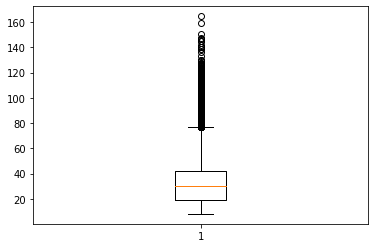

In [80]:
plt.boxplot(x=data['living_area'])

Нижний «ус» около 8, минимального значение. Верхний заканчивается около 80 — это 1,5 межквартильного размаха, добавленного к 3-му квартилю. Это ориентировочная граница нормального размаха. Всё, что лежит за ней, можно считать выбросом. Более высокие значения рисуются отдельными точками, но сливаются в единую жирную линию: таких выбросов очень много. И всё же значения, которые отсёк верхний «ус», — редкие. Видно, насколько медиана (оранжевая линия) не стремится к длинному хвосту высоких значений. 

Посмотрим, сколько объектов с жилой площадью более 100 м2, это могут быть, как бывшие комунальные квартиры в Санкт Петербурге, так и элитное жилье.

In [81]:
print('Объектов с жилой площадью более 100 м2:', ((len(data.query('living_area > 100')) / len(data)) * 100), '% от общего количества объектов')


Объектов с жилой площадью более 100 м2: 0.7328990228013029 % от общего количества объектов


Менее 1%, мы можем исключить их из анализа.

In [82]:
data = data.query('living_area < 100')

Построим гистрограмму по отфильтрованным данным.

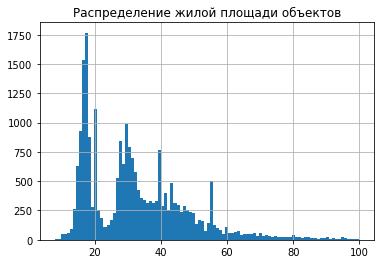

In [83]:
data['living_area'].hist(bins=100);
plt.title('Распределение жилой площади объектов')
plt.show()

#### Площадь кухни

Изучим значения площади кухни. Построим гистограмму по столбцу `kitchen_area`

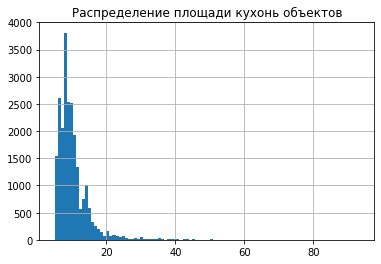

In [84]:
data['kitchen_area'].hist(bins=100);
plt.title('Распределение площади кухонь объектов')
plt.show()

Мы видим, что большая часть значений находится между 5 и 30 м2, далее идут редкие значений и, возможно, выбросы. Есть 3 пика, около 5, 10 и 15 м2. Возможно, это связано с распространненостью типовой застройки, как, например, в т.н. "хрущевках" чаще всего кухни около 5-8 м2, в новых домах около 10 и около 15 м2.

Посмотрим описание данных и "ящик с усами"

In [85]:
data['kitchen_area'].describe()

count    23152.000000
mean        10.253484
std          5.060670
min          5.000000
25%          7.300000
50%          9.000000
75%         11.500000
max         93.200000
Name: kitchen_area, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8b44e10340>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8b03cc3370>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8b44e104c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8b03cc3160>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8b03cc33d0>],
 'means': []}

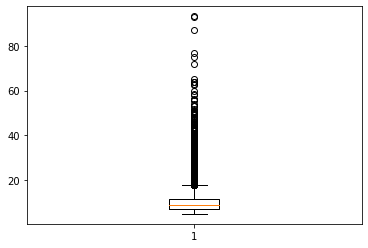

In [86]:
plt.boxplot(x=data['kitchen_area'])

Большая часть кухонь имеет размер до 11,5 м2. 
Нижний «ус» около 5, минимального значение. Верхний заканчивается около 18 — это 1,5 межквартильного размаха, добавленного к 3-му квартилю. Это ориентировочная граница нормального размаха. Всё, что лежит за ней, можно считать выбросом. Более высокие значения рисуются отдельными точками, но сливаются в единую жирную линию: таких выбросов очень много. И всё же значения, которые отсёк верхний «ус», — редкие. Видно, насколько медиана (оранжевая линия) не стремится к длинному хвосту высоких значений.

Посмотрим, сколько объектов с площадью кухни более 30 м2, это могут быть квартиры со свободной планировкой, а также элитное жилье.

In [87]:
print('Объектов с площадью кухни более 30 м2:', ((len(data.query('kitchen_area > 30')) / len(data)) * 100), '% от общего количества объектов')


Объектов с площадью кухни более 30 м2: 1.0495853489979268 % от общего количества объектов


Около 1%, можно исключить их из анализа.

In [88]:
data = data.query('kitchen_area < 30')

Построим гистрограмму по отфильтрованным данным.

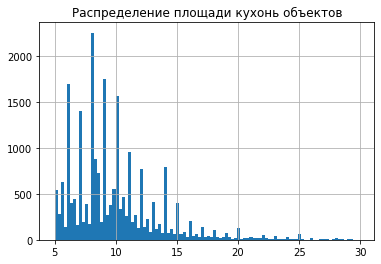

In [89]:
data['kitchen_area'].hist(bins=100);
plt.title('Распределение площади кухонь объектов')
plt.show()

Мы видим, что распространены кухни 6, 7, 8, 9, 10, 11, 12 и 14 м2, возможно, из-за распространения типовой застройки.

#### Цена объекта

Изучим значения цены объекта. Построим гистограмму по столбцу `last_price`.

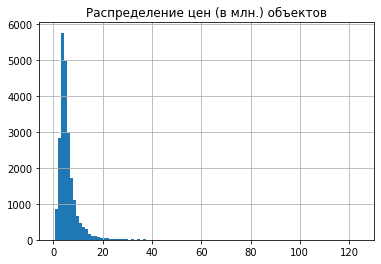

In [90]:
(data['last_price'] / 1000000).hist(bins=100);
plt.title('Распределение цен (в млн.) объектов')
plt.show()

Мы видим, что большая часть значений находится между 430 000 и 20 000 000 , далее идут редкие значений и, возможно, выбросы. 

Посмотрим описание данных и "ящик с усами"

In [91]:
data['last_price'].describe()

count    2.286200e+04
mean     5.687543e+06
std      4.730450e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.550000e+06
75%      6.500000e+06
max      1.240000e+08
Name: last_price, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8b449d7820>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8b449d7880>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8b4511f310>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8b03c16130>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8b03c161f0>],
 'means': []}

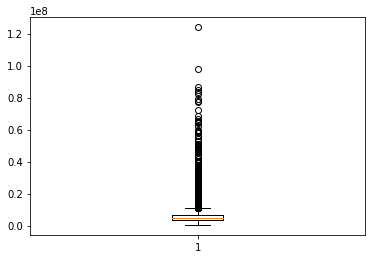

In [92]:
plt.boxplot(x=data['last_price'])

Большая часть объектов имеют цены до 10 000 000. 
Нижний «ус» около 430 000, минимального значение. Верхний заканчивается около 10 000 000 — это 1,5 межквартильного размаха, добавленного к 3-му квартилю. Это ориентировочная граница нормального размаха. Всё, что лежит за ней, можно считать выбросом. Более высокие значения рисуются отдельными точками, но сливаются в единую жирную линию: таких выбросов очень много. И всё же значения, которые отсёк верхний «ус», — редкие. Видно, насколько медиана (оранжевая линия) не стремится к длинному хвосту высоких значений.

Посмотрим, сколько объектов с ценой более 30 000 000, это может быть элитное жилье.

In [93]:
print('Объектов с ценой более 30 000 000:', ((len(data.query('last_price > 30000000')) / len(data)) * 100), '% от общего количества объектов')


Объектов с ценой более 30 000 000: 0.5073921791619281 % от общего количества объектов


Менее 1%, можно исключить их из анализа.

In [94]:
data = data.query('last_price < 30000000')

Построим гистрограмму по отфильтрованным данным.

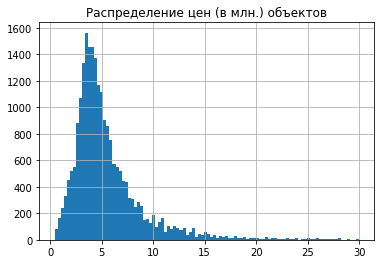

In [95]:
(data['last_price'] / 1000000).hist(bins=100);
plt.title('Распределение цен (в млн.) объектов')
plt.show()

In [96]:
data['last_price'].describe()

count    2.274300e+04
mean     5.478078e+06
std      3.559962e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.550000e+06
75%      6.490000e+06
max      2.999900e+07
Name: last_price, dtype: float64

Средняя цена - 5 295 000,  мединая 4 480 000. Мы видим, что самая распространенная цена - около 4 000 000. Скорее всего, это из-за объектов на окраине Санкт Петербурга и в области.

#### количество комнат

Изучим значения количества комнат объекта. Построим гистограмму по столбцу `rooms`.

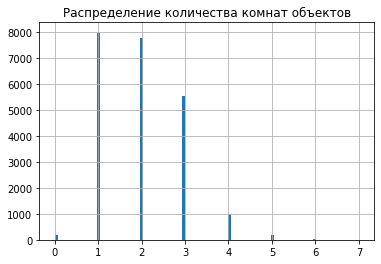

In [97]:
data['rooms'].hist(bins=100);
plt.title('Распределение количества комнат объектов')
plt.show()

В датасете комант от 0 (скорее всего, квартиры со свободной планировкой) до 7. Больше всего по 1, 2 и 3 комнаты, самые распростаненные типы квартир.

Проверим объеты с 0 комнатами и несвободной планировкой.

In [98]:
len(data.query('rooms == 0 & open_plan == False'))

135

In [99]:
len(data)

22743

135 значений. Это явно данные с ошибкой, удалим их.

In [100]:
data.loc[(data['rooms'] == 0) & (data['open_plan'] == False), 'rooms'] = None 
data = data.dropna(subset=['rooms']) 

Посмотрим описание данных и "ящик с усами"

In [101]:
data['rooms'].describe()

count    22608.000000
mean         2.006016
std          0.939944
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8b44bb11f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8b44c311f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8b44bb12e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8b44c31820>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8b44a192e0>],
 'means': []}

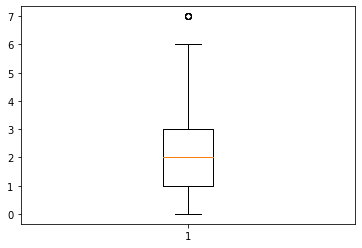

In [102]:
plt.boxplot(x=data['rooms'])

Большая часть кухонь имеет размер до 11,5 м2. 
Нижний «ус» около 0, минимального значение. Верхний заканчивается около 6 — это 1,5 межквартильного размаха, добавленного к 3-му квартилю. Это ориентировочная граница нормального размаха. Всё, что лежит за ней, можно считать выбросом. Более высокие значения рисуются отдельной точкой. Скорее всего, значения, которые отсёк верхний «ус», — редкие. Видно, насколько медиана (оранжевая линия) не стремится к длинному хвосту высоких значений.

Посмотрим, сколько объектов с 7 комнатами, это могут быть элитные квартиры, или бывшие коммунальные квартиры в Санкт Петербурге.

In [103]:
print('Объектов с 7 комнатами:', ((len(data.query('rooms == 7')) / len(data)) * 100), '% от общего количества объектов')


Объектов с 7 комнатами: 0.02653927813163482 % от общего количества объектов


Менее 1%, можно исключить их из анализа.

In [104]:
data = data.query('rooms < 7')

Построим гистрограмму по отфильтрованным данным.

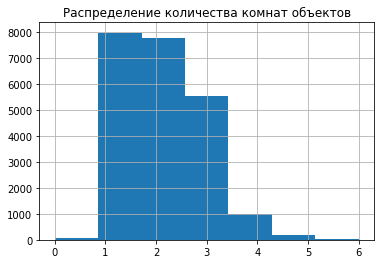

In [105]:
data['rooms'].hist(bins=7);
plt.title('Распределение количества комнат объектов')
plt.show()

Мы видим, что распространены объекты с 1, 2 и 3 комнатами, это самые распростаненные типы квартир. Больше всего объектов с 1 комнатой, чуть меньше с 2.

#### Высота потолков

Изучим высоту потолков объектов. Построим гистограмму по столбцу `ceiling_height`.

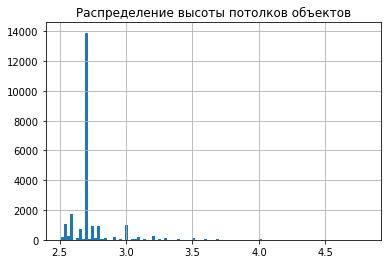

In [106]:
data['ceiling_height'].hist(bins=100);
plt.title('Распределение высоты потолков объектов')
plt.show()

Мы видим, что большая часть значений находится между 2,5 и 3 м, далее идут редкие значений и, возможно, выбросы. Есть несколько, около 2,7 и 3 м. Возможно, это связано с распространненостью типовой застройки, как, например, в т.н. "хрущевках" чаще всего потолки около 2,7 м, в новых домах могут быть около 3 м, также на самый высокий пик в 2,7 м влияет заполнение нами пропусков медианным значением (как раз 2,7 м).

Посмотрим описание данных и "ящик с усами"

In [107]:
data['ceiling_height'].describe()

count    22602.000000
mean         2.736076
std          0.173652
min          2.510000
25%          2.700000
50%          2.700000
75%          2.700000
max          4.800000
Name: ceiling_height, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8b451be100>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8b451be7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8b452ced60>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8b451bee80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8b451c0220>],
 'means': []}

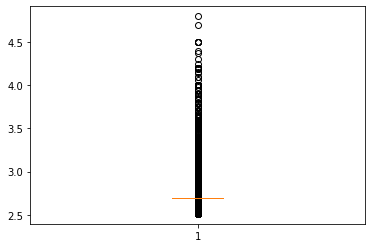

In [108]:
plt.boxplot(x=data['ceiling_height'])

Большая часть объектов имеют высоту дло 2,75 м. 
Нижний «ус» около 2,5, минимального значение. Верхний заканчивается около 2,8 — это 1,5 межквартильного размаха, добавленного к 3-му квартилю. Это ориентировочная граница нормального размаха. Всё, что лежит за ней, можно считать выбросом. Более высокие значения рисуются отдельными точками, но сливаются в единую жирную линию: таких выбросов очень много. И всё же значения, которые отсёк верхний «ус», — редкие. Видно, насколько медиана (оранжевая линия) не стремится к длинному хвосту высоких значений.

Посмотрим, сколько объектов с высотой потолка свыше 4 м это могут быть квартиры из старого фонда Санкт Петербурка и элитное жилье.

In [109]:
print('Объектов с высотой потолка свыше 4 м:', ((len(data.query('ceiling_height > 4')) / len(data)) * 100), '% от общего количества объектов')


Объектов с высотой потолка свыше 4 м: 0.11503406778161224 % от общего количества объектов


Менее 1%, можно исключить их из анализа.

In [110]:
data = data.query('ceiling_height <= 4')

Построим гистрограмму по отфильтрованным данным.

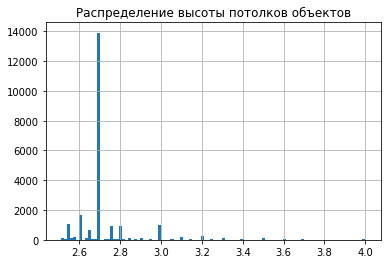

In [111]:
data['ceiling_height'].hist(bins=100);
plt.title('Распределение высоты потолков объектов')
plt.show()

In [112]:
data['ceiling_height'].describe()

count    22576.000000
mean         2.734273
std          0.165293
min          2.510000
25%          2.700000
50%          2.700000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

Средняя высота потолков 2,74 м, медианная 2,7 м. Мы видим, что объекты с высотой потолков 2,7 2,8 и 3 м, возможно, из-за распространения типовой застройки.

#### Этаж квартиры;

Изучим значения этажа объекта. Построим гистограмму по столбцу `floor`.

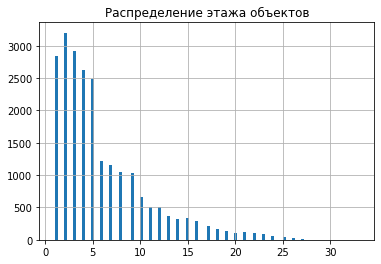

In [113]:
data['floor'].hist(bins=100);
plt.title('Распределение этажа объектов')
plt.show()

Мы видим, что большая часть значений находится между 1 и 30, далее идут редкие значений и, возможно, выбросы. больше всего объектов с 1 по 5 этажи, это связано с тем, что очень мало осталось домов менее 5 этажей.

Посмотрим описание данных и "ящик с усами"

In [114]:
data['floor'].describe()

count    22576.000000
mean         5.885365
std          4.886093
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8b03ba5e20>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8b45288fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8b03ba5880>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8b45288190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8b452883d0>],
 'means': []}

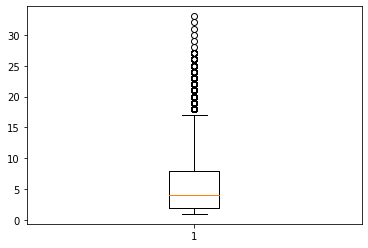

In [115]:
plt.boxplot(x=data['floor'])

Большая часть объектов находятся до 16 этажа. 
Нижний «ус» около 1, минимального значение. Верхний заканчивается около 17 — это 1,5 межквартильного размаха, добавленного к 3-му квартилю. Это ориентировочная граница нормального размаха. Всё, что лежит за ней, можно считать выбросом. Более высокие значения рисуются отдельными точками, но сливаются в единую жирную линию: таких выбросов очень много. И всё же значения, которые отсёк верхний «ус», — редкие. Видно, насколько медиана (оранжевая линия) не стремится к длинному хвосту высоких значений.

В этот раз убирать выбросы не будем, т.к. новые дома имеют высоту свыше 30 этажей, протсто они не так распространены, как дома до 17 этажей

#### Тип этажа квартиры («первый», «последний», «другой»)

Изучим значения типа этажа объекта. Построим гистограмму по столбцу `floor_type`.

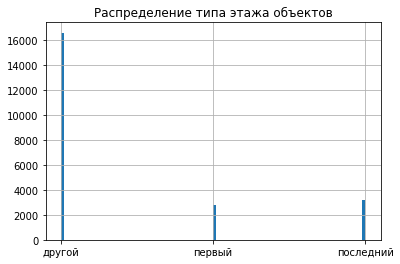

In [116]:
data['floor_type'].hist(bins=100);
plt.title('Распределение типа этажа объектов')
plt.show()

Мы видим, что большая часть объектов находятся не на первом и не на последнем этажах. Объекты на последнем этаже продают немного чаще, чем на первом.

#### общее количество этажей в доме

Изучим значения общего количества этажей в доме. Построим гистограмму по столбцу `floors_total`.

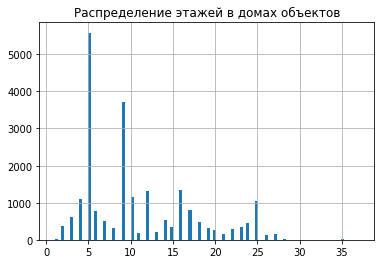

In [117]:
data['floors_total'].hist(bins=100);
plt.title('Распределение этажей в домах объектов')
plt.show()

Мы видим, что большая часть значений находится между 1 и 25 м2, далее идут редкие значений и, возможно, выбросы. Есть 4 пика: 5, 9, 12 и 16. Возможно, это связано с распространненостью типовой застройки: хрущевки чаще всего имеют 5 этажей, дома современного типа чаще всего имеют 9, 12, 16 и 25 этажей.

#### Расстояние до центра города в метрах

Изучим значения расстояния до центра города в метрах объекта. Построим гистограмму по столбцу `city_centers_nearest`.

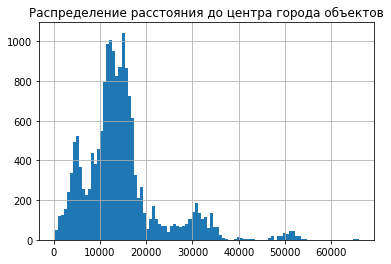

In [118]:
data['city_centers_nearest'].hist(bins=100);
plt.title('Распределение расстояния до центра города объектов')
plt.show()

Мы видим, что большая часть значений находится между 0 и 50 000 м, далее идут редкие значений и, возможно, выбросы. Есть 2 пика, около 50 000 и 15 000 м. Возможно, это связано с удаленностью основных спальных районов Санкт Петербурга.

Посмотрим описание данных.

In [119]:
data['city_centers_nearest'].describe()

count    17158.000000
mean     14527.358142
std       8577.237318
min        208.000000
25%       9851.500000
50%      13277.000000
75%      16454.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

В среднем объекты находятся на расстоянии 14 527 м от центра, медианное значение 13 277 м. Ближайший к центру объект находится на расстоянии 208 метров, а самый удаленный - 65 968 м. Большая часть объектов находятся на расстоянии 16 453 м.

#### Расстояние до ближайшего аэропорта

Изучим значения расстояния до ближайшего аэропорта объектов. Построим гистограмму по столбцу `airports_nearest`.

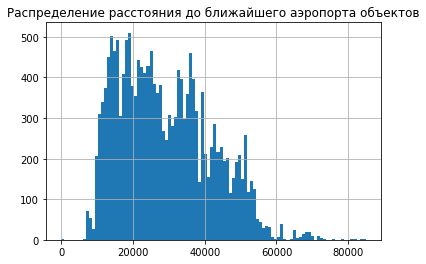

In [120]:
data['airports_nearest'].hist(bins=100);
plt.title('Распределение расстояния до ближайшего аэропорта объектов')
plt.show()

Мы видим, что большая часть значений находится между 6 000 и 60 000 м2, далее идут редкие значений и, возможно, выбросы.

Посмотрим описание данных и "ящик с усами"

In [121]:
data['airports_nearest'].describe()

count    17138.000000
mean     28888.081106
std      12796.191202
min          0.000000
25%      18396.500000
50%      26968.500000
75%      37434.000000
max      84869.000000
Name: airports_nearest, dtype: float64

В среднем от аэропорта объекты находятся на расстоянии 28 888 м, медианное значение 26 968 м, ближайший объект находится непосредственно у аэропорта, самый удаленный - на расстоянии 84 869 м. Большая часть объектов находится на расстоянии 37 434 м от аэропорта, т.к. центр Санкт Петербурга находится на расстоянии около 22 000 м.

#### Расстояние до ближайшего парка

Изучим значения расстояния до ближайшего парка объектов. Построим гистограмму по столбцу `parks_nearest`.

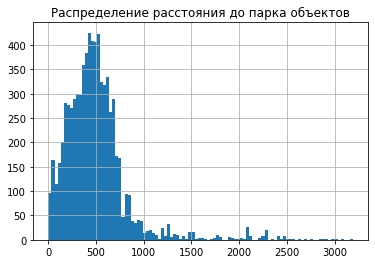

In [122]:
data['parks_nearest'].hist(bins=100);
plt.title('Распределение расстояния до парка объектов')
plt.show()

Мы видим, что большая часть значений находится между 0 и 1000 м2, далее идут редкие значений и, возможно, выбросы. Есть основной пик около 500 м.

Посмотрим описание данных.

In [123]:
data['parks_nearest'].describe()

count    7457.000000
mean      494.947700
std       342.638801
min         1.000000
25%       290.000000
50%       458.000000
75%       616.000000
max      3190.000000
Name: parks_nearest, dtype: float64

В среднем объекты находятся на расстоянии 495 м, медианное значение 458 м. Ближайший объект находится непосредственно у парка, а самый удаленный на расстоянии 3 190 м. Большая часть объектов находится на расстоянии 616 м, скорее всего это связано с большим количеством парков в городах.

#### День и месяц публикации объявления

Изучим в какие дни недели публиковались объявления. Построим гистограмму по столбцу `weekday`.

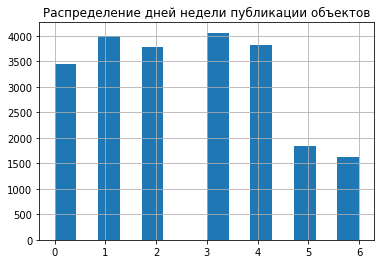

In [124]:
data['weekday'].hist(bins=14);
plt.title('Распределение дней недели публикации объектов')
plt.show()

Мы видим, чаще всего объекты публиковали в будние дни, на выходных происходит явный спад. Возможно, это связано с тем, что риелторы публикуют большую часть объявлений, и работают по будням. Также, возможно, в выходные люди предпочитают заниматься другими занятиями.

Изучим в какие месяцы публиковались объявления. Построим гистограмму по столбцу `month`.

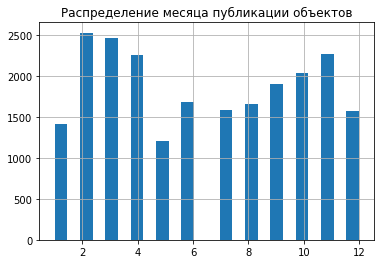

In [125]:
data['month'].hist(bins=24);
plt.title('Распределение месяца публикации объектов')
plt.show()

Чаще всего объявления публикуют в феврале, марте, апреле и ноябре, реже всего в январе и мае, возможно, это связано с большим количеством праздников в эти месяцы.

#### Как быстро продавались квартиры 

Изучим как быстро продавались квартиры. Построим гистограмму по столбцу `days_exposition`.

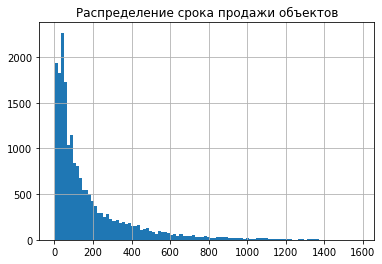

In [126]:
data['days_exposition'].hist(bins=100);
plt.title('Распределение срока продажи объектов')
plt.show()

Мы видим, что большая часть значений находится между 1 и 600 дней, далее идут редкие значений и, возможно, выбросы. Чаще всего объекты продаются за первые месяцы.

Посмотрим описание данных.

In [127]:
data['days_exposition'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    19636.000000
mean       177.244042
std        215.689527
min          1.000000
5%           9.000000
25%         44.000000
50%         93.000000
75%        226.000000
95%        627.000000
max       1580.000000
Name: days_exposition, dtype: float64

И посмотрим количество пропусков в этом столбце

In [128]:
data['days_exposition'].isna().sum()

2940

В столбце 2940 пропуска, возможно, это объявления акутальные на дату выгрузки данных.  
В среднем объекты продаются за 215 дней, медианное значение 177 дней. Самая быстрая продажа - за 1 день, дольше всего объект продаваля 1580 дней, это более 4-х лет.  Сверхбыстрыми продажами можем считать сделанные за 9 дней, а сверхдолгими - свыше 627 дней. 
Мы можем предположить, что объявления, которые продержались 1 день были сделаны по ошибке, или повторно выкладывались, после чего их удаляли. Объявления, которые были на сайте более 3 лет, были попросту забыты.  
Посмотрим, какой процент они сотсавляют.

In [129]:
print('Объектов с со сроком продажи менее 2 и более 1095 дней:', (((len(data.query('days_exposition <= 1')) + len(data.query('days_exposition > 1095'))) / (len(data) - data['days_exposition'].isna().sum())) * 100), '% от общего количества объектов')


Объектов с со сроком продажи менее 2 и более 1095 дней: 0.7537176614381749 % от общего количества объектов


Менее 1 %, исключим их из анализа.

In [130]:
data = data.query('days_exposition > 1')
data = data.query('days_exposition < 1095')

Построим гистрограмму по отфильтрованным данным.

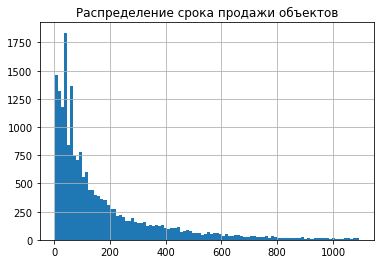

In [131]:
data['days_exposition'].hist(bins=100);
plt.title('Распределение срока продажи объектов')
plt.show()

От 1 др 100 мы видим ярко выраженные пики, взгляним на этот участок подробнее.

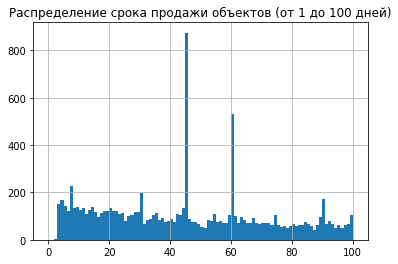

In [132]:
data['days_exposition'].hist(bins=100, range=(0, 100));
plt.title('Распределение срока продажи объектов (от 1 до 100 дней)')
plt.show()

На 45 и 60 днях есть самые большие пики. Возможно, это связано с правилами размещения объявлений на пощадке.

Взглянем на "ящик с усами" по отфильтрованным данным.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8b453dd3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8b453dda00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8b453dd550>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8b44ae02b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8b44ae0dc0>],
 'means': []}

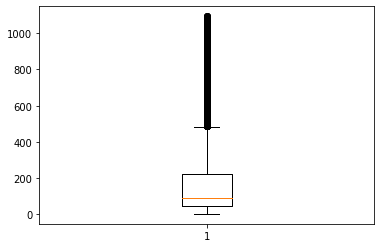

In [133]:
plt.boxplot(x=data['days_exposition'])

Нижний ус у нас около минмума, а верхний около 500 дней. Т.о. можем сказать, что продажи более 500 дней являются необычно долгими.

В среднем объекты продаются за 215 дней, медианное значение 177 дней. Самая быстрая продажа - за 1 день, дольше всего объект продаваля 1580 дней, это более 4-х лет. Сверхбыстрыми продажами можем считать сделанные за 9 дней, а сверхдолгими - свыше 627 дней. Мы можем предположить, что объявления, которые продержались 1 день были сделаны по ошибке, или повторно выкладывались, после чего их удаляли. А объявления, которые были на сайте более 3 лет, были попросту забыты.
Быстрыми продажами можем считать продажи до 44 дней, а необычно долгими - свыше 500.

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Взглянем, какие факторы больше всего вляют на цену объекта, для этого посмотрим коэффициет корреляции столбцов `total_area`, `kitchen_area`, `rooms`, `floor_type`, `weekday`, `month`, `year` с ценой объекта `last_price`.

In [134]:
data[['last_price','total_area', 'kitchen_area', 'rooms', 'floor_type', 'weekday', 'month', 'year']].corr()

,last_price,total_area,kitchen_area,rooms,weekday,month,year
last_price,1.000000,0.760876,0.546042,0.472643,-0.008958,0.006677,-0.043040
total_area,0.760876,1.000000,0.520381,0.792838,-0.010342,0.007091,-0.094141
kitchen_area,0.546042,0.520381,1.000000,0.150172,-0.007342,0.012434,-0.049578
rooms,0.472643,0.792838,0.150172,1.000000,-0.005241,0.000695,-0.072668
weekday,-0.008958,-0.010342,-0.007342,-0.005241,1.000000,0.010150,0.005463
month,0.006677,0.007091,0.012434,0.000695,0.010150,1.000000,-0.202218
year,-0.043040,-0.094141,-0.049578,-0.072668,0.005463,-0.202218,1.000000


Мы видим, что больше всего на цену влияет площадь объекта, на втором месте площадь кухни и количество комнат (параметры, напрямую связанные с площадью объекта). День недели, месяц и год продажи либо практически не влияют на цену, либо влияют не линейно. Проверим это далее.

Визуализируем зависимость этих параметров.

**Цена - площадь объекта**

Построим графики зависимости цены объекта от его площади.

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

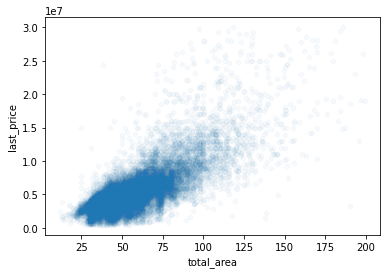

In [135]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.03)

Мы видим, что есть положительная корреляция между ценой объекта и его площадью.

**Цена - площадь кухни объекта**

Построим график зависимости цены объекта от площади его кухни.

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

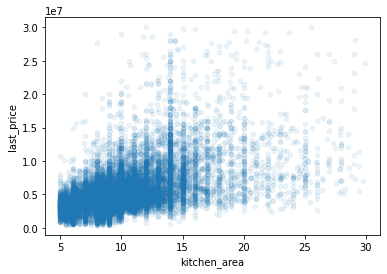

In [136]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.08)

На данном графике зависимоть не так очевидна, но все равно прослеживается.

**Цена - количество комнат объекта**

Построим график зависимости цены объекта от площади его кухни.

<AxesSubplot:xlabel='last_price', ylabel='rooms'>

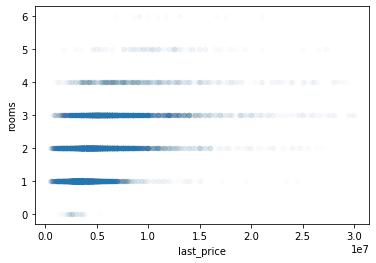

In [137]:
data.plot(x='last_price', y='rooms', kind='scatter', alpha=0.01)

Как и в предыдущем случае, зависимость не так прозрачна, но прослеживается. С увеличеснием количества комнат цена растет.

Проверим это, построим график зависимости общей цены от количества комнат, сгруппированным по средним значениям.

<AxesSubplot:xlabel='rooms'>

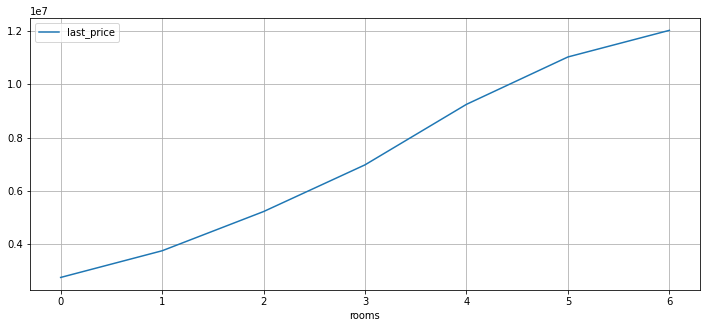

In [138]:
(data
 .pivot_table(index='rooms', values='last_price', aggfunc='mean')
 .plot(grid=True, figsize=(12, 5))
)

По средним значениям видно, что с увеличением количества комнат, цена растет.

**Цена - тип этажа объекта**

Построим график зависимости средней цены объекта от дня недели публикации.

<AxesSubplot:xlabel='floor_type'>

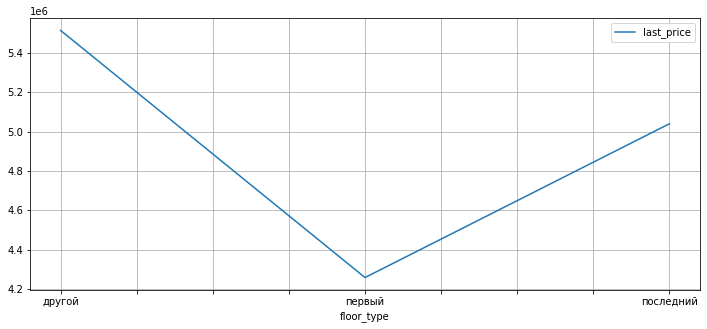

In [139]:
(data
 .pivot_table(index='floor_type', values='last_price', aggfunc='mean')
 .plot(grid=True, figsize=(12, 5))
)

На первом этаже в среднем самая низкая цена объекта, самая высокая - у объетов, расположенных ни на первом, ни на последнем этажах. Квартиры на 1 этаже считаются менее популярными и менее удобными у покупателей (из-за того, что больше людей проходит мимо квартиры, у окружающих есть возможность заглянуть, или пробраться в окна), как и квартиры на последних этажах (из-за неудобства спускаться с верхнего этажа, а также боязнь затопления из-за проблем на крыше). 

**Цена - день недели публикации объявления**

Построим график зависимости средней и медианной цены объекта от дня недели публикации.

<AxesSubplot:xlabel='weekday'>

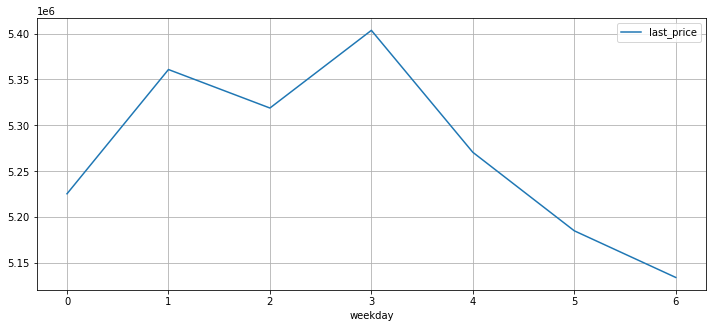

In [140]:
(data
 .pivot_table(index='weekday', values='last_price', aggfunc='mean')
 .plot(grid=True, figsize=(12, 5))
)

Прямой корреляции нет, но видно, что у объявлений, выложенных во вторник, среду и четверг средняя цена выше, чем у объявлений, выложенных в понедельник, пятницу, субботу и восресенье. Причем у объявлений, выложенных в субботу и пятницу самая низкая средняя цена, а у объявлений, выложенных в четверг - самая высокая.

**Цена - месяц публикации объявления**

Построим график зависимости средней цены объекта от месяцы публикации.

<AxesSubplot:xlabel='month'>

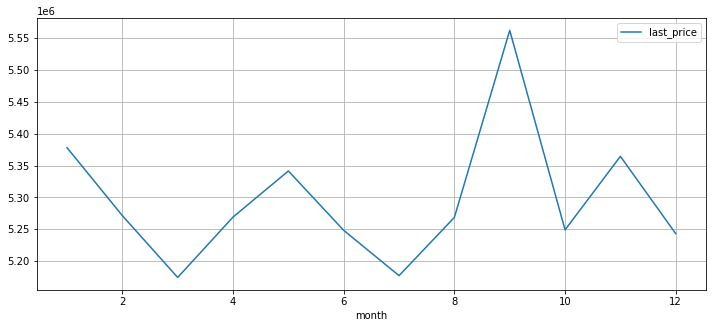

In [141]:
(data
 .pivot_table(index='month', values='last_price', aggfunc='mean')
 .plot(grid=True, figsize=(12, 5))
)

На графике мы видим, что в март и июль в среднем самые низние цены, а в сентябре - самые высокие.

**Цена - год публикации объявления**

Построим график зависимости средней цены объекта от года публикации.

<AxesSubplot:xlabel='year'>

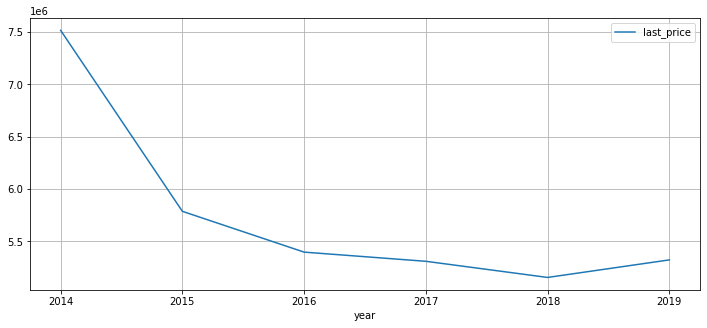

In [142]:
(data
 .pivot_table(index='year', values='last_price', aggfunc='mean')
 .plot(grid=True, figsize=(12, 5))
)

На графике мы видим, что с 2014 года по 2018 год был спад средней цены объекта, и к 2019 году только начался подъем. Возможно, это связано с экономическим кризисом 2014 года.

#### Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Посчитаем по населенному пункуту количество объявлений, среднюю и медианную цену квадратного метра, и выведем первые 10.

In [143]:
#создадим новую переменную
top_10_data = (
    #группируем данные цены квадратного метра по населенным пунктам
    data.pivot_table(index='locality_name', 
                        values='price_per_square', 
    #считаем количество, медиану и среднее цены за квадратный метр
                        aggfunc=['count', 'median', 'mean'])
    #сортируем таблицу по количеству объявлений
    .sort_values(by=[('count','price_per_square')], ascending=False)
    #выводим первые 10 строк
    .head(10)

)
top_10_data

,count,median,mean
,price_per_square,price_per_square,price_per_square
locality_name,,,
Санкт-Петербург,12797,102319.240,107933.714067
Мурино,525,85322.580,85339.233562
Кудрово,428,94299.580,94246.854346
поселок Шушары,400,76037.185,77601.206650
Всеволожск,330,65613.405,68410.603818
Колпино,306,73820.925,74736.739085
поселок Парголово,299,91428.570,89695.928930
Пушкин,294,97725.710,101737.315408


Мы димим, что больше всего объявлений в Санкт-Петербурге, Мурино, Кудрово, поселке Шушары, Всеволожске, Колпино, поселке Парголово, Пушкине, Гатчине и Выборге. Санкт-Петербург является вторым по населению России, а оставшиеся населенные пункты - одни из самых населенных пунктов Ленинградской области.

Населенные пункты с самой высокой ценой за квадратный метр:

In [144]:
top_10_data.sort_values(by=[('mean','price_per_square')], ascending=False).head(3)

,count,median,mean
,price_per_square,price_per_square,price_per_square
locality_name,,,
Санкт-Петербург,12797,102319.24,107933.714067
Пушкин,294,97725.71,101737.315408
Кудрово,428,94299.58,94246.854346


Населенные пункты с самой высокой ценой за квадратный метр: Санкт-Петербург, Пушкин, Кудряво.

Населенные пункты с самой низкой ценой за квадратный метр:

In [145]:
top_10_data.sort_values(by=[('mean','price_per_square')]).head(3)

,count,median,mean
,price_per_square,price_per_square,price_per_square
locality_name,,,
Выборг,205,56944.440,57049.437024
Гатчина,266,67180.705,67901.317406
Всеволожск,330,65613.405,68410.603818


Населенные пункты с самой низкой ценой за квадратный метр: Выборг, Гатчина, Всеволожск.

#### Средняя цена каждого километра Санкт-Петербурга

Поссчитаем среднюю цену квадратного метра в городе Санкт-Петербург для каждого расстояния от центра города

,price_per_square
distance_to_center_km,
0.0,116698.229000
1.0,132477.061102
2.0,126732.194583
3.0,110652.257564
4.0,122979.237454
5.0,129852.832558
6.0,128694.030864
7.0,127419.682755
8.0,121444.095261


<AxesSubplot:xlabel='distance_to_center_km'>

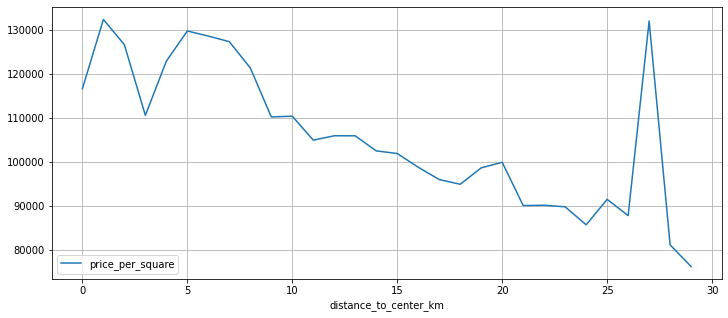

In [146]:
display(
    #выберем из данных только объекты, у которых указан населенный пункт Санкт-Петербург
    data[data['locality_name'] == "Санкт-Петербург"]
    #сгруппируем данные цены за квадратный километр по расстоянию от центра, посчитав среднее занчение
    .pivot_table(index='distance_to_center_km', values='price_per_square', aggfunc='mean')
)
display(
    data[data['locality_name'] == "Санкт-Петербург"]
    .pivot_table(index='distance_to_center_km', values='price_per_square', aggfunc='mean')
    #выведем график зависимости
    .plot(grid=True, figsize=(12, 5))
)


Мы видим, что с удалением от центра, цена квадратного метра объекта в седнем уменьшается, только на расстоянии 27 километров есть необычный пик, возможно, это связано с тем, что на этом расстоянии недостаточно количество объявлений, и выборка наша искажена, посмотрим количество.

In [147]:
display(
    #выберем из данных только объекты, у которых указан населенный пункт Санкт-Петербург
    data[data['locality_name'] == "Санкт-Петербург"]
    #сгруппируем данные цены за квадратный километр по расстоянию от центра, посчитав среднее занчение
    .pivot_table(index='distance_to_center_km', values='price_per_square', aggfunc='count')
)

,price_per_square
distance_to_center_km,
0.0,10
1.0,127
2.0,192
3.0,234
4.0,491
5.0,649
6.0,428
7.0,294
8.0,479


Да, действительно, если на растстоянии от 1 до 19 км у нас есть сотни объявлений, то дальше их количество сильно уменьшается, из-за чего наши результаты могут быть искажены.


С увеличением расстояния объекта от центра города цена его квадратного метра уменьшается.

**Вывод** 
- Мы добавили в таблицу столбец `price_per_square` со значением цены за квадратный метр объекта.
- Добавили столбец `weekday` с днем недели даты публикации объявления.
- Добавили столбец `month` с месяцем даты публикации объявления.
- Добавили столбец `year` с годом даты публикации объявления.
- Добавили `floor_type`, с типом этажа объекта.
- Добавили столице `distance_to_center_km` с расстоянием объекта до центра города в километрах.
- Проанализировали общие площади объектов: самые распространенные объекты с площадью от 30 до 100 м2., средний размер - 60,3 м2, медианный - 52 м2.
- Проанализировали жилые площади объектов: больше всего объектов с площадью от 18 до 50 м2, с характерными для типовой застройки пиками около 18, 30, 40 и 50 м2. Средний размер - 33 м2, медианный - 30 м2.
- Проанализировали площади кухни объектов:  больше всего объектов с площадью от 5 до 30 м2, с пиками около 5, 10 и 15 м2, возможно, это связано с распространненостью типовой застройки. Средний размер 10, 25, медианой 9 м2.
- Проанализировали цены объектов: больше всего объектов с ценой от 400 000 до 10 000 000, средняя цена - 5 295 000,  мединая 4 480 000.
- Проанализировали количества комнат объектов, больше всего объектов с 1 комнатой, потом идут объекты с 2 комнатами, 3 комнатами и 4 комнатами.
- Проанализировали высоту потолков: средняя высота 2,74 м, медианная 2,7 м.
- Проанализировали этажи, на которых находятся объекты: больше всего объектов на этажах с 1 по 5, после чего количество объектов резко уменьшается и идет по нисходящей.
- Проанализировали типы этажей объектов: больше всего объектов находятся между первым и последним этажом, намного меньше объектов на последнем этаж и еще меньше на первом.
- Проанализировали расстояние до центра города от объектов: среднем объекты находятся на расстоянии 14 527 м от центра, медианное значение 13 277 м., большая часть объектов находятся на расстоянии 16 453 м.
- Проанализировали расстояние до ближайшего аэропорта от объекта: В среднем от аэропорта объекты находятся на расстоянии 28 888 м, медианное значение 26 968 м, ближайший объект находится непосредственно у аэропорта, самый удаленный - на расстоянии 84 869 м., большая часть объектов находится на расстоянии 37 434 м от аэропорта, т.к. центр Санкт-Петербурга находится на расстоянии около 22 000 м.
- Проанализировали расстояние до ближайшего парта от объектов: В среднем объекты находятся на расстоянии 495 м, медианное значение 458 м., ближайший объект находится непосредственно у парка, а самый удаленный на расстоянии 3 190 м.
- Проанализировали дни и месяцы публикации: чаще всего объекты публиковали в будние дни, на выходных происходит явный спад.
- Проанализировали сроки продажи объектов: в среднем объекты продаются за 215 дней, медианное значение 177 дней, самая быстрая продажа - за 1 день, дольше всего объект продаваля 1580 дней, это более 4-х лет, сверхбыстрыми продажами можем считать сделанные за 9 дней, а сверхдолгими - свыше 627 дней, быстрыми продажами можем считать продажи до 44 дней, а необычно долгими - свыше 500.
- Между площадью объекта и его ценой есть положительная корреляция.
- Между количеством комнат объекта и его ценой также есть положительная корреляция.
- Объекты находящиеся между первым и последним этажом в среднем дорожи, объекты на первом этаже - с самой низкой в среднем ценой.
- У объявлений, выложенных во вторник, среду и четверг средняя цена выше, чем у объявлений, выложенных в понедельник, пятницу, субботу и восресенье.
- В март и июль в среднем самые низние цены, а в сентябре - самые высокие.
- С 2014 года по 2018 год был спад средней цены объекта, и к 2019 году только начался подъем.
- Больше всего объявлений в Санкт-Петербурге, Мурино, Кудрово, поселке Шушары, Всеволожске, Колпино, поселке Парголово, Пушкине, Гатчине и Выборге (в порядке убывания количества объявлений).
- Населенные пункты с самой высокой ценой за квадратный метр: Санкт-Петербург, Пушкин, Кудряво (в порядке убывания цены).
- Населенные пункты с самой низкой ценой за квадратный метр: Выборг, Гатчина, Всеволожск (в порядке возрастания цены).
- С удалением от центра, цена квадратного метра объекта в седнем уменьшается.


### Общий вывод

Мы выполнили предобработку данных сервиса Яндекс Недвижимость и изучили их.  
В ходе работы была проведена предобработка данных: убраны пропуски и исправлены ошибочные значения. Исправлены названия населенных пунктов. Ошибки и пропуски скорее всего связаны с ошибкой пользователя при вводе данных. В дальнейшем советуем сделать поля ввода высоты потолка, жилой площади, площади кухни и этажность дома обязательными, а также ограничить вводимую высоту потолков 10 метрами. Также, возможно, автоматическая система определения расстояния до центра города, ближайшего аэропорта и парка работает с ошибками, т.к. в этих данных много пропусков.  
  
Мы определили:
- самые распространенные объекты с площадью от 30 до 100 м2., средний размер - 60,3 м2, медианный - 52 м2.
- больше всего объектов с площадью от 18 до 50 м2, с характерными для типовой застройки пиками около 18, 30, 40 и 50 м2. Средний размер - 33 м2, медианный - 30 м2.
-  больше всего объектов с площадью от 5 до 30 м2, с пиками около 5, 10 и 15 м2, возможно, это связано с распространненостью типовой застройки. Средний размер 10, 25, медианой 9 м2.
- Больше всего объектов с ценой от 400 000 до 10 000 000, средняя цена - 5 295 000,  мединая 4 480 000.
- Больше всего объектов с 1 комнатой, потом идут объекты с 2 комнатами, 3 комнатами и 4 комнатами.
- Средняя высота потолков 2,74 м, медианная 2,7 м.
- Больше всего объектов на этажах с 1 по 5, после чего количество объектов резко уменьшается и идет по нисходящей.
- Больше всего объектов находятся между первым и последним этажом, намного меньше объектов на последнем этаж и еще меньше на первом.
- В среднем объекты находятся на расстоянии 14 527 м от центра, медианное значение 13 277 м., большая часть объектов находятся на расстоянии 16 453 м.
- В среднем от аэропорта объекты находятся на расстоянии 28 888 м, медианное значение 26 968 м, ближайший объект находится непосредственно у аэропорта, самый удаленный - на расстоянии 84 869 м., большая часть объектов находится на расстоянии 37 434 м от аэропорта, т.к. центр Санкт-Петербурга находится на расстоянии около 22 000 м.
- В среднем объекты находятся на расстоянии 495 м, медианное значение 458 м., ближайший объект находится непосредственно у парка, а самый удаленный на расстоянии 3 190 м.
- Чаще всего объекты публиковали в будние дни, на выходных происходит явный спад.
- В среднем объекты продаются за 215 дней, медианное значение 177 дней, самая быстрая продажа - за 1 день, дольше всего объект продаваля 1580 дней, это более 4-х лет, сверхбыстрыми продажами можем считать сделанные за 9 дней, а сверхдолгими - свыше 627 дней, быстрыми продажами можем считать продажи до 44 дней, а необычно долгими - свыше 500.
- Между площадью объекта и его ценой есть положительная корреляция.
- Между количеством комнат объекта и его ценой также есть положительная корреляция.
- Объекты находящиеся между первым и последним этажом в среднем дорожи, объекты на первом этаже - с самой низкой в среднем ценой.
- У объявлений, выложенных во вторник, среду и четверг средняя цена выше, чем у объявлений, выложенных в понедельник, пятницу, субботу и восресенье.
- В март и июль в среднем самые низние цены, а в сентябре - самые высокие.
- С 2014 года по 2018 год был спад средней цены объекта, и к 2019 году только начался подъем.
- Больше всего объявлений в Санкт-Петербурге, Мурино, Кудрово, поселке Шушары, Всеволожске, Колпино, поселке Парголово, Пушкине, Гатчине и Выборге (в порядке убывания количества объявлений).
- Населенные пункты с самой высокой ценой за квадратный метр: Санкт-Петербург, Пушкин, Кудряво (в порядке убывания цены).
- Населенные пункты с самой низкой ценой за квадратный метр: Выборг, Гатчина, Всеволожск (в порядке возрастания цены).
- С удалением от центра, цена квадратного метра объекта в седнем уменьшается.
